In [3]:
import pandas as pd
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pd.options.display.max_rows

60

In [4]:
from google.colab import files
uploaded = files.upload()

Saving covidla.csv to covidla (2).csv


In [5]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['covidla.csv']))

In [6]:
df2.tail()

,Date,Confirmed Cases,Active Cases,Cured,Death
117,27/06/2020,509448,NaN,NaN,15690
118,28/06/2020,529590,NaN,NaN,16104
119,29/06/2020,549200,NaN,NaN,16488
120,30/06/2020,567539,NaN,NaN,16905
121,01/07/20,585493,NaN,NaN,17400


Index(['Date', 'Confirmed Cases', 'Active Cases', 'Cured', 'Death'], dtype='object')


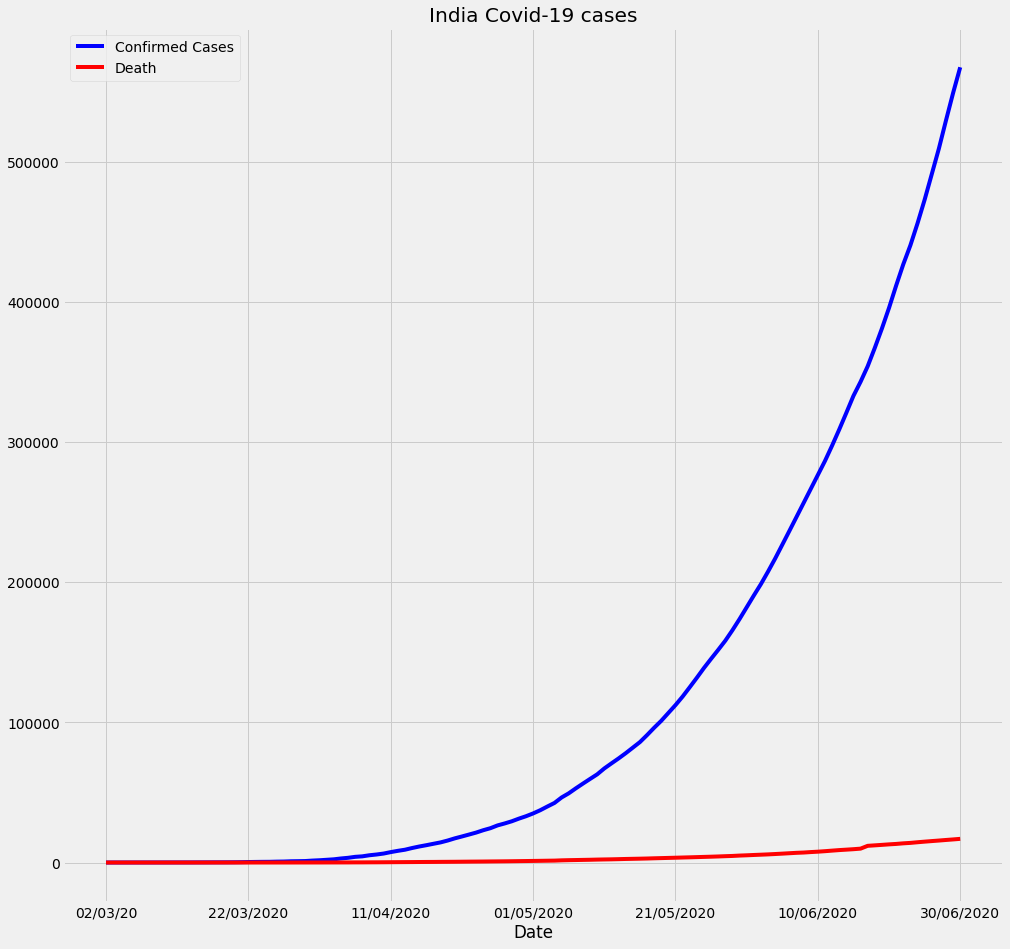

In [7]:
import matplotlib
from matplotlib import pyplot


from pandas import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


series = pd.read_csv('covidla.csv')
print(series.columns)

plt.rcParams["figure.figsize"]=15,15 

# Plot column 'Confirmed'
series.plot( x = 'Date', y = 'Confirmed Cases', color = 'blue')

ax1 = plt.gca()

series.plot(x = 'Date', y = 'Death', color = 'red', ax = ax1)
plt.title("India Covid-19 cases")
plt.show()

In [78]:
selcols=['Date','Confirmed Cases']
newdf=series[selcols]
print(newdf.head())
deathcols=['Date','Death']
newdf1=series[deathcols]

       Date  Confirmed Cases
0  02/03/20                2
1  03/03/20               24
2  04/03/20               26
3  05/03/20               34
4  06/03/20               40


In [79]:

cs=newdf['Confirmed Cases']
ds=newdf1['Death']



In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
s_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in s_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(cs,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:3262.5480804747294
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3023.544413844233
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2736.664577001989
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2398.979839347696
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2370.7947002856326
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2301.9750768916942
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1991.5350401290357
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1961.9219718991083
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:3150.2899797170567
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2817.377489924989
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2634.9068535882593
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2461.6149597045696
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2860.4462402514405
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2810.0088498648133
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2366.1487121581285
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2319.4664929872924
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2453.851654238445
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2172.2805894739345
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AI

In [80]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
s_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in s_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(ds,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            result_death = mod1.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, result_death.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2425.3527032910697
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2093.1442561205054
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1996.5024306856767
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1711.5441010067352
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1698.0439723710267
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1721.077515679344
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1558.5246359509397
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1517.3628944469078
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2322.3659583258145
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1944.2620056734777
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1842.146919623084
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1579.655147254351
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1608.951370482862
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1575.7681468768321
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1483.963902003254
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1460.235732131951
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1663.5594713415837
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1480.9279145511234
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC

In [84]:
mod = sm.tsa.statespace.SARIMAX(cs,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

mod1 = sm.tsa.statespace.SARIMAX(ds,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_death = mod1.fit()



In [94]:
pd.options.display.float_format = '{:,.0f}'.format
from datetime import datetime
pred = results.get_prediction(start=120,end=151)
pred_ci = pred.conf_int()
pred_ci["Date"]=pd.date_range(start='30-06-2020', periods=len(pred_ci))



print(pred_ci)


     lower Confirmed Cases  upper Confirmed Cases       Date
120                567,941                570,437 2020-06-30
121                585,292                587,786 2020-07-01
122                603,210                608,501 2020-07-02
123                621,136                629,820 2020-07-03
124                639,771                652,391 2020-07-04
125                658,813                675,873 2020-07-05
126                677,976                699,955 2020-07-06
127                697,487                724,846 2020-07-07
128                717,027                750,213 2020-07-08
129                737,031                776,481 2020-07-09
130                757,104                803,251 2020-07-10
131                777,676                830,947 2020-07-11
132                799,032                859,851 2020-07-12
133                820,886                889,536 2020-07-13
134                843,216                920,016 2020-07-14
135                866,0

In [97]:
pd.options.display.float_format = '{:,.0f}'.format
death = results_death.get_prediction(start=120,end=152)
pred_death = death.conf_int(alpha=0.01)
pred_death["Date"]=pd.date_range(start='30-06-2020', periods=len(pred_death))






print(pred_death)

     lower Death  upper Death       Date
120       16,619       17,548 2020-06-30
121       17,031       17,960 2020-07-01
122       17,347       18,685 2020-07-02
123       17,837       19,506 2020-07-03
124       18,296       20,259 2020-07-04
125       18,865       21,100 2020-07-05
126       19,471       21,966 2020-07-06
127       20,088       22,833 2020-07-07
128       20,644       23,633 2020-07-08
129       21,229       24,460 2020-07-09
130       21,895       25,364 2020-07-10
131       24,127       27,835 2020-07-11
132       24,764       28,710 2020-07-12
133       25,412       29,577 2020-07-13
134       26,087       30,475 2020-07-14
135       26,722       31,333 2020-07-15
136       27,479       32,318 2020-07-16
137       28,138       33,208 2020-07-17
138       28,960       34,265 2020-07-18
139       29,749       35,292 2020-07-19
140       30,524       36,310 2020-07-20
141       31,291       37,325 2020-07-21
142       32,103       38,389 2020-07-22
143       32,941

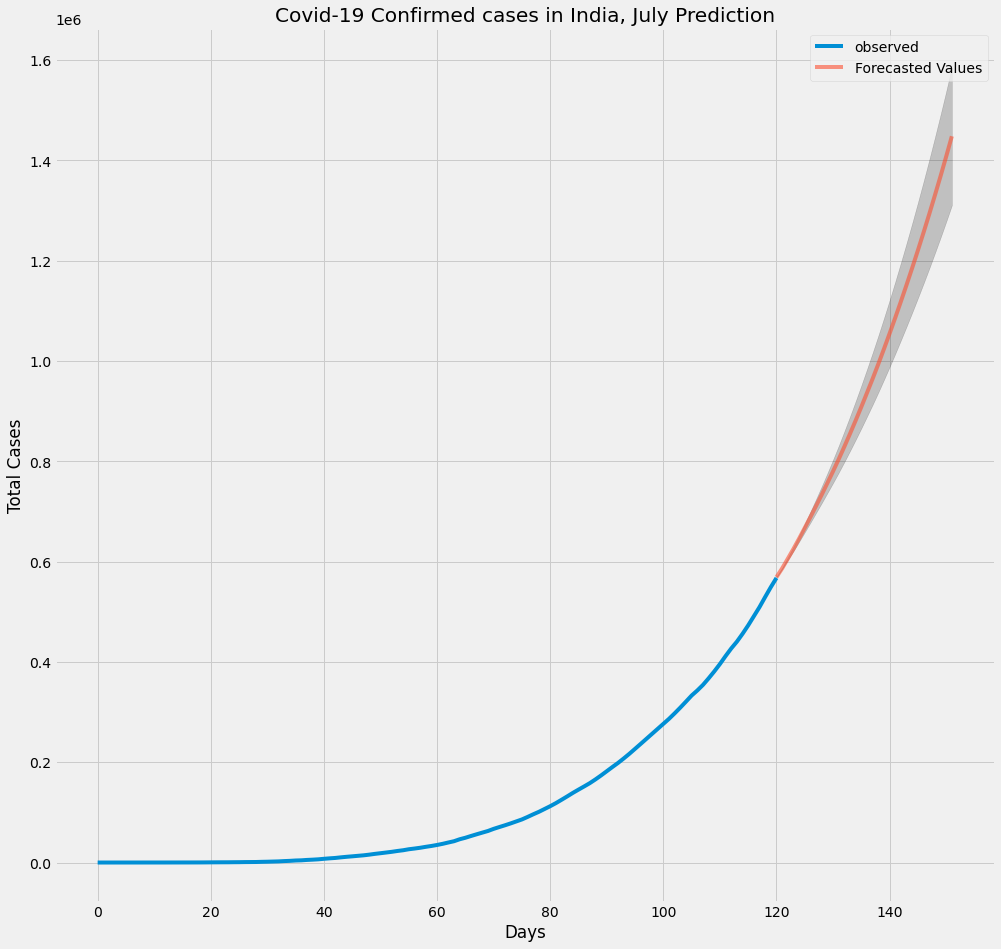

In [107]:
ax = cs.plot(label='observed')



pred.predicted_mean.plot(ax=ax, label='Forecasted Values', alpha=.6, figsize=(15,15))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                
                color='k',
                alpha=.2)

ax.set_xlabel('Days')
ax.set_ylabel('Total Cases')
plt.title("Covid-19 Confirmed cases in India, July Prediction")
plt.legend()
plt.show()

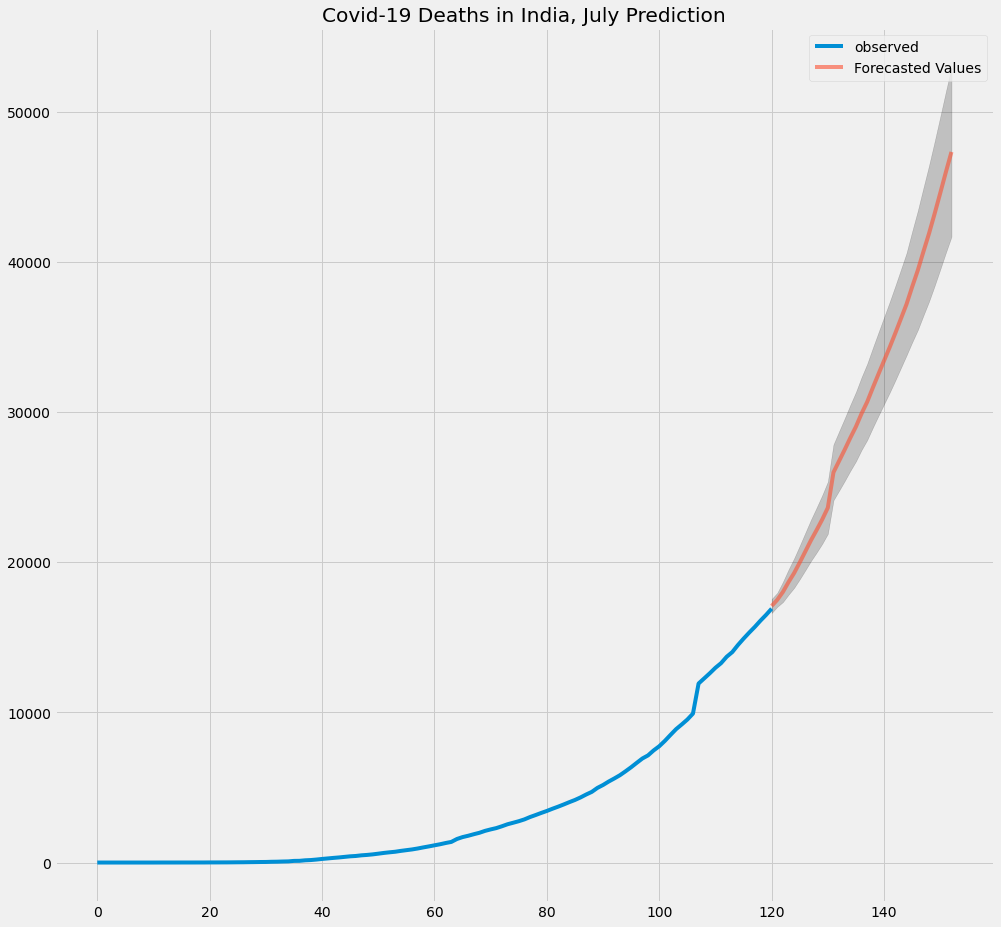

In [106]:
dx = ds.plot(label='observed')



death.predicted_mean.plot(ax=dx, label='Forecasted Values', alpha=.6, figsize=(15,15))
dx.fill_between(pred_death.index,
                pred_death.iloc[:, 0],
                pred_death.iloc[:, 1],
                
                color='k',
                alpha=.2)

ax.set_xlabel('Days')
ax.set_ylabel('Total Cases')
plt.title("Covid-19 Deaths in India, July Prediction")
plt.legend()
plt.show()